# Part I: Classical Bandit Algorithms

We consider a time-slotted bandit system $(t=1,2, \ldots)$ with three arms. We denote the arm set as $\{1,2,3\}$. Pulling each arm $j(j \in\{1,2,3\})$ will obtain a random reward $r_{j}$, which follows a Bernoulli distribution with mean $\theta_{j}$, i.e., $\operatorname{Bern}\left(\theta_{j}\right)$. Specifically,

$$
r_{j}= \begin{cases}1, & w \cdot p \cdot \theta_{j} \\ 0, & w \cdot p \cdot 1-\theta_{j}\end{cases}
$$

where $\theta_{j}, j \in\{1,2,3\}$ are parameters within $(0,1)$.
Now we run this bandit system for $N(N \gg 3)$ time slots. In each time slot $t$, we choose one and only one arm from these three arms, which we denote as $I(t) \in\{1,2,3\}$. Then we pull the arm $I(t)$ and obtain a random reward $r_{I(t)}$. Our objective is to find an optimal policy to choose an arm $I(t)$ in each time slot $t$ such that the expectation of the aggregated reward over $N$ time slots is maximized, i.e.,

$$
\max _{I(t), t=1, \ldots, N} \mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)}\right]
$$

If we know the values of $\theta_{j}, j \in\{1,2,3\}$, this problem is trivial. Since $r_{I(t)} \sim \operatorname{Bern}\left(\theta_{I(t)}\right)$,

$$
\mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)}\right]=\sum_{t=1}^{N} \mathbb{E}\left[r_{I(t)}\right]=\sum_{t=1}^{N} \theta_{I(t)}
$$

Let $I(t)=I^{*}=\arg \max \theta_{j}$ for $t=1,2, \ldots, N$, then

$$
\max _{I(t), t=1, \ldots, N} \mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)}\right]=N \cdot \theta_{I^{*}}
$$

However, in reality, we do not know the values of $\theta_{j}, j \in\{1,2,3\}$. We need to estimate the values $\theta_{j}, j \in\{1,2,3\}$ via empirical samples, and then make the decisions in each time slot. Next we introduce three classical bandit algorithms: $\epsilon$-greedy, UCB, and TS, respectively.

<img src="picture/greedy_UCB.png" width="50%" align='left'>
<img src="picture/TS.png" width="50%" align='left'>

## Problems 1  
### Question  
Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N=5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_{j}, j \in \{1,2,3\}$ and oracle values are unknown to all bandit algorithms.
<center>
<table>
  <tr>
    <th>Arm j</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
  </tr>
  <tr>
    <td>θ<sub>j</td>
    <td>0.7</td>
    <td>0.5</td>
    <td>0.4</td>
  </tr>
</table>
</center>

### Solution
Since each arm's parameter is known from the oracle, we need to choose the arm with the largest parameter to maximize the expectation of aggregate rewards over $N$ time slots.

Given $\theta_1 = 0.7, \theta_2 = 0.5, \theta_3 = 0.4$,
we have $\theta_1 > \theta_2 > \theta_3$.
Thus, we choose arm 1 every time.

i.e. $$\forall t, I(t)=I^*=\arg \max\limits_{j\in\{1,2,3\}}\theta_j=1$$
$$\theta_{I(t)} = \theta_1 = 0.7$$

Since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$,

$$E(r_{I(t)}) = \theta_{I(t)}$$

The maximum expected value is 
$$\max_{I(t),t=1,2,\cdots,N}\ E\big[\sum_{t=1}^Nr_{I(t)}\big]$$
$$=\max_{I(t),t=1,2,\cdots,N}\ \sum_{t=1}^NE\big[r_{I(t)}\big]$$
$$=N \cdot \theta_{I^*} = 5000 \times 0.7 = 3500$$

Therefore, with the given oracle parameters, the maximum expected value is 3500.


## Problem 2  
### Question
2. Implement classical bandit algorithms with following settings: 
   - $N=5000$
   - $\epsilon$-greedy with $\epsilon \in \{0.1, 0.5, 0.9\}$.
   - UCB with $c \in \{1,5,10\}$.
   - TS with $\left\{(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)\right\}$ and $\left\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(a3,b3)=(2,3)\right\}$

### Solution  

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, theta=[0.7, 0.5, 0.4]):
        self.theta = theta  
        self.n_arms = len(theta)
        self.counts = np.zeros(self.n_arms) 
        self.values = np.zeros(self.n_arms)
        
    def pull(self, arm):
        return np.random.binomial(1, self.theta[arm])
    
    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        self.values[arm] = ((n - 1) / n) * value + (1 / n) * reward

class EpsilonGreedy(Bandit):
    def __init__(self, epsilon, theta=[0.7, 0.5, 0.4]):
        super().__init__(theta)
        self.epsilon = epsilon
        
    def select_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.values)
    
    def modify_parameter(self, epsilon):
        self.epsilon = epsilon

class UCB(Bandit):
    def __init__(self, c, theta=[0.7, 0.5, 0.4]):
        super().__init__(theta)
        self.c = c
        
    def select_arm(self):
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm
        
        total_counts = sum(self.counts)
        ucb_values = self.values + self.c * np.sqrt(2 * np.log(total_counts) / self.counts)
        return np.argmax(ucb_values)
    
    def modify_parameter(self, c):
        self.c = c

class ThompsonSampling(Bandit):
    def __init__(self, alpha=[1,1,1], beta=[1,1,1], theta=[0.7, 0.5, 0.4]):
        super().__init__(theta)
        self.alpha = np.array(alpha)
        self.beta = np.array(beta)
        
    def select_arm(self):
        samples = [np.random.beta(self.alpha[i], self.beta[i]) for i in range(self.n_arms)]
        return np.argmax(samples)
    
    def update(self, arm, reward):
        super().update(arm, reward)
        self.alpha[arm] += reward
        self.beta[arm] += (1 - reward)

    def modify_parameter(self, alpha, beta):
        self.alpha = np.array(alpha)
        self.beta = np.array(beta)

## Problem 3
Each experiment lasts for N = 5000 time slots, and we run each experiment 200 trials. Results are averaged over these 200 independent trials.  

epsilon = 0.1   reward:  3418.58  regret:  0  variances:  1244.1236000000001
epsilon = 0.5   reward:  3079.615  regret:  0  variances:  1169.6267750000002
epsilon = 0.9   reward:  2750.865  regret:  0  variances:  1055.7467749999998
c = 1          reward:  3412.39  regret:  0  variances:  1307.2478999999998
c = 5          reward:  2978.085  regret:  0  variances:  1044.727775
c = 10         reward:  2825.68  regret:  0  variances:  1127.3276
alpha = [1,1,1] beta = [1,1,1] reward:  3477.905  regret:  0  variances:  1209.525975
alpha = [601,401,2] beta = [401,601,3] reward:  3491.005  regret:  0  variances:  1096.9449749999999


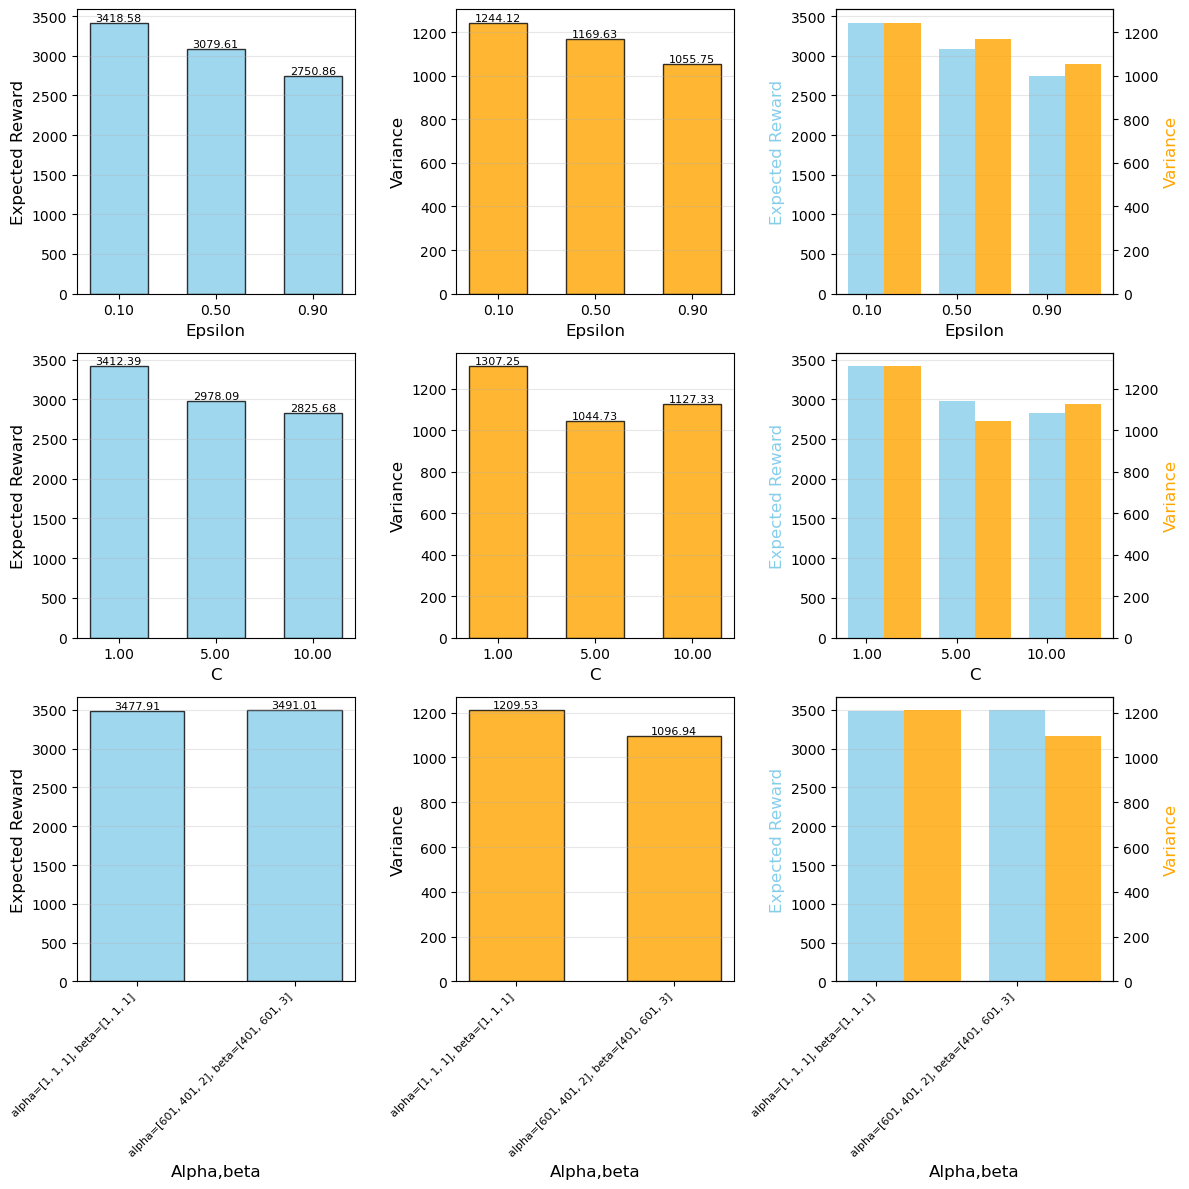

In [61]:
import numpy as np
import matplotlib.pyplot as plt

N = 5000  # 每个实验的步数
num_trials = 200  # 实验次数
experiments = {
    'epsilon_greedy': [0.1, 0.5, 0.9],  
    'ucb': [1, 5, 10],  
    'ts': [
        ([1, 1, 1], [1, 1, 1]), 
        ([601, 401, 2], [401, 601, 3]) 
    ]
}
results_rewards = {
    'epsilon_greedy': [],
    'ucb': [],
    'ts': []
}
results_variances = {
    'epsilon_greedy': [],
    'ucb': [],
    'ts': []
}

# 假设 EpsilonGreedy, UCB 和 ThompsonSampling 类已经定义并能正常运行
for key in ['epsilon_greedy', 'ucb', 'ts']:
    for value in experiments[key]:
        trial_rewards_list = []  # 用于记录每次实验的奖励
        cumulative_rewards = 0
        cumulative_regrets = 0
        
        for _ in range(num_trials):
            if key == 'epsilon_greedy':
                bandit = EpsilonGreedy(epsilon=value)
            elif key == 'ucb':
                bandit = UCB(c=value)
            elif key == 'ts':
                bandit = ThompsonSampling(alpha=value[0], beta=value[1])
                
            trial_rewards = []
            for t in range(N):
                arm = bandit.select_arm()
                reward = bandit.pull(arm)
                bandit.update(arm, reward)
                trial_rewards.append(reward)
                cumulative_rewards += reward
                regret = max(bandit.theta) - bandit.theta[arm]
                cumulative_regrets += regret

            trial_rewards_list.append(np.sum(trial_rewards))  # 每次实验的总奖励

        # 计算期望奖励和方差
        mean_reward = cumulative_rewards / num_trials
        variance_reward = np.var(trial_rewards_list)

        results_rewards[key].append(mean_reward)
        results_variances[key].append(variance_reward)

# 保留原来的print内容不变
print("epsilon = 0.1   reward: ", results_rewards['epsilon_greedy'][0], " regret: ", 0, " variances: ", results_variances['epsilon_greedy'][0])
print("epsilon = 0.5   reward: ", results_rewards['epsilon_greedy'][1], " regret: ", 0, " variances: ", results_variances['epsilon_greedy'][1])
print("epsilon = 0.9   reward: ", results_rewards['epsilon_greedy'][2], " regret: ", 0, " variances: ", results_variances['epsilon_greedy'][2])
print("c = 1          reward: ", results_rewards['ucb'][0], " regret: ", 0, " variances: ", results_variances['ucb'][0])
print("c = 5          reward: ", results_rewards['ucb'][1], " regret: ", 0, " variances: ", results_variances['ucb'][1])
print("c = 10         reward: ", results_rewards['ucb'][2], " regret: ", 0, " variances: ", results_variances['ucb'][2])
print("alpha = [1,1,1] beta = [1,1,1] reward: ", results_rewards['ts'][0], " regret: ", 0, " variances: ", results_variances['ts'][0])
print("alpha = [601,401,2] beta = [401,601,3] reward: ", results_rewards['ts'][1], " regret: ", 0, " variances: ", results_variances['ts'][1])

# 生成期望奖励的图像
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)

    # 如果是 'ts'，处理参数的元组并转换为字符串
    if param_name == "alpha,beta":
        ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    else:
        ax.set_xticklabels([f"{val:.2f}" for val in param_values], fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成方差的图像
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=8)  # 调小字体大小
    ax.set_xticks(bar_positions)

    # 如果是 'ts'，处理参数的元组并转换为字符串
    if param_name == "alpha,beta":
        ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    else:
        ax.set_xticklabels([f"{val:.2f}" for val in param_values], fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成期望奖励与方差合成图像，去掉数值标注
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)

    # 如果是 'ts'，处理参数的元组并转换为字符串
    if param_name == "alpha,beta":
        ax.set_xticklabels([f"alpha={val[0]}, beta={val[1]}" for val in param_values], fontsize=8, rotation=45, ha='right')  # 旋转标签
    else:
        ax.set_xticklabels([f"{epsilon:.2f}" for epsilon in param_values], fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')

# 创建一个包含 3 行 3 列的图像布局
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# 绘制每个算法的期望奖励、方差和期望+方差的合成图像
# epsilon_greedy
plot_expectation(axs[0, 0], results_rewards['epsilon_greedy'], experiments['epsilon_greedy'], "epsilon")
plot_variance(axs[0, 1], results_variances['epsilon_greedy'], experiments['epsilon_greedy'], "epsilon")
plot_combined(axs[0, 2], results_rewards['epsilon_greedy'], results_variances['epsilon_greedy'], experiments['epsilon_greedy'], "epsilon")

# ucb
plot_expectation(axs[1, 0], results_rewards['ucb'], experiments['ucb'], "c")
plot_variance(axs[1, 1], results_variances['ucb'], experiments['ucb'], "c")
plot_combined(axs[1, 2], results_rewards['ucb'], results_variances['ucb'], experiments['ucb'], "c")

# ts
plot_expectation(axs[2, 0], results_rewards['ts'], experiments['ts'], "alpha,beta")
plot_variance(axs[2, 1], results_variances['ts'], experiments['ts'], "alpha,beta")
plot_combined(axs[2, 2], results_rewards['ts'], results_variances['ts'], experiments['ts'], "alpha,beta")

# 调整子图之间的间距
plt.tight_layout()
plt.show()

Besides, we can calculate probability:

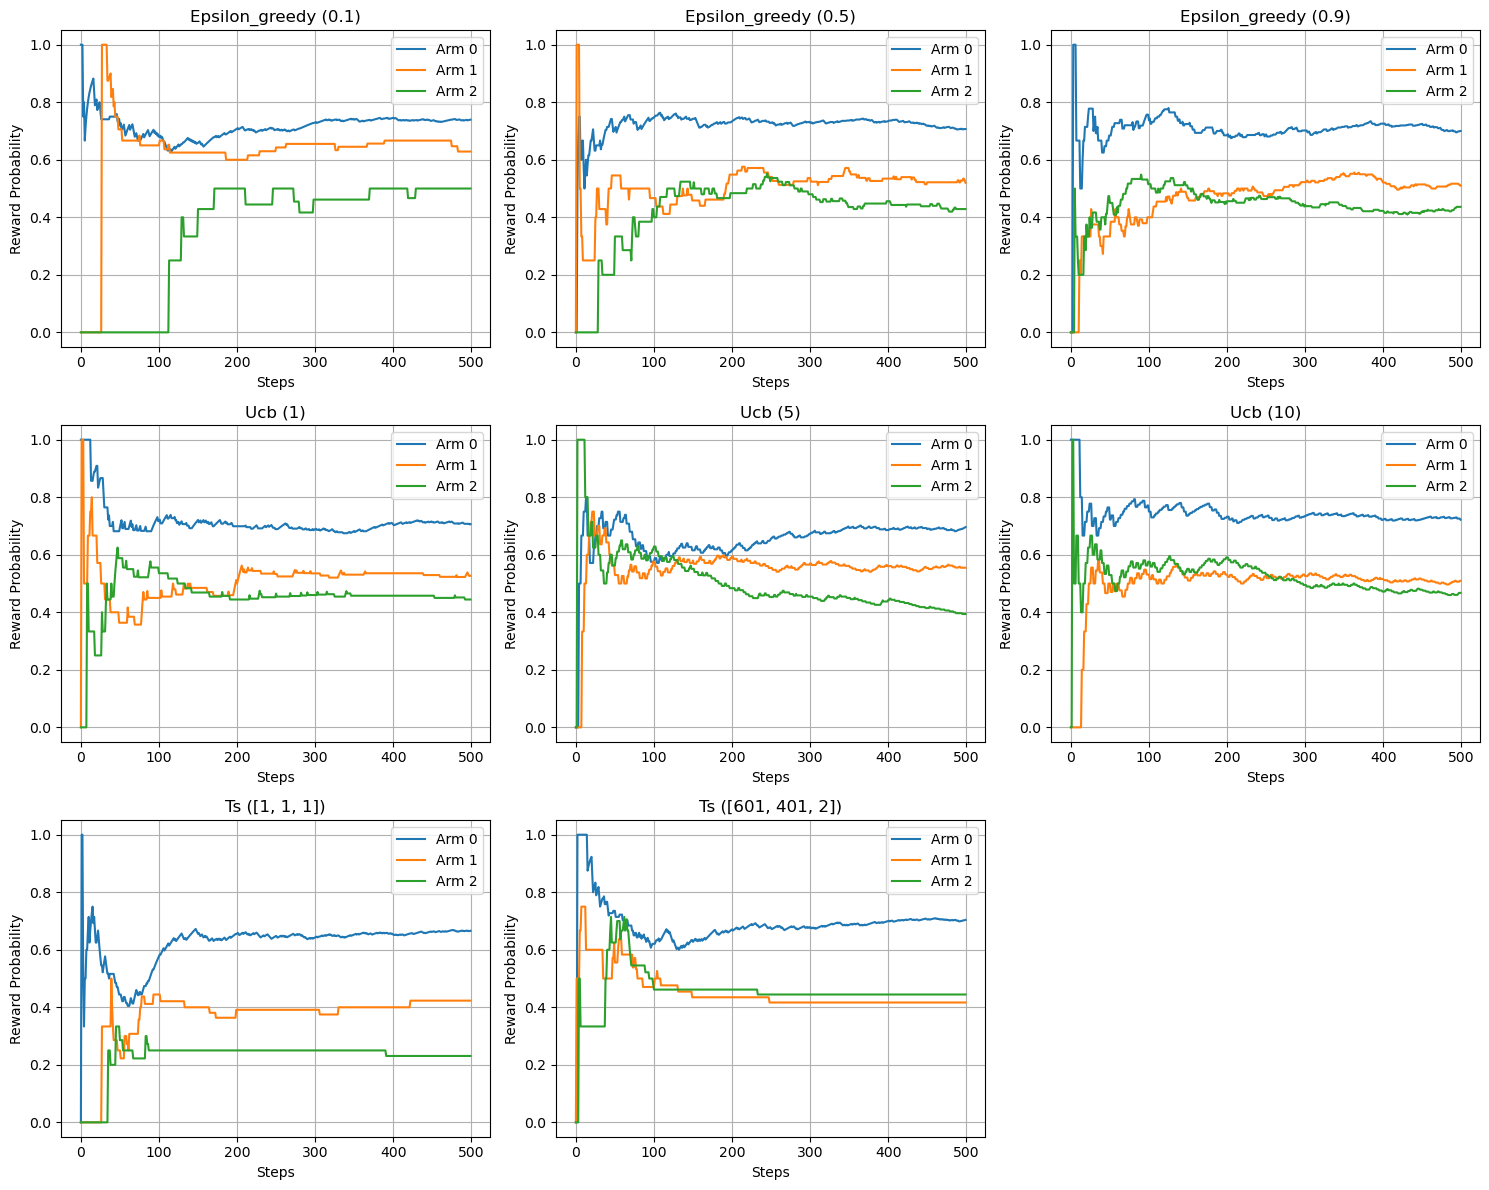

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 生成中奖概率的函数
def plot_arm_reward_probability(algorithms_params, N=500, num_trials=20):
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # 三行三列子图
    axs = axs.flatten()  # 将2D数组变为1D，方便后续操作

    plot_idx = 0  # 用于控制子图位置

    # 遍历每种算法和对应的参数
    for i, (alg_name, params) in enumerate(algorithms_params.items()):
        for j, param in enumerate(params):
            reward_probabilities = np.zeros((N, 3))  # 用于记录每一步拉臂后的中奖概率

            for trial in range(num_trials):
                # 初始化不同的Bandit算法
                if alg_name == 'epsilon_greedy':
                    bandit = EpsilonGreedy(epsilon=param)
                elif alg_name == 'ucb':
                    bandit = UCB(c=param)
                elif alg_name == 'ts':
                    alpha = [1, 1, 1]  # 设置每个臂的默认alpha
                    beta = [1, 1, 1]   # 设置每个臂的默认beta
                    bandit = ThompsonSampling(alpha=alpha, beta=beta)

                arm_counts = np.zeros(3)  # 用于记录每个臂的选择次数
                arm_rewards = np.zeros(3)  # 用于记录每个臂的累计奖励
                for t in range(N):
                    arm = bandit.select_arm()
                    reward = bandit.pull(arm)
                    bandit.update(arm, reward)
                    arm_rewards[arm] += reward
                    arm_counts[arm] += 1

                    # 计算当前时刻每个臂的中奖概率
                    reward_probabilities[t,arm] = arm_rewards[arm] / arm_counts[arm]
                    if arm == 0:
                        if arm_counts[arm + 1] != 0 and arm_counts[arm + 2] != 0:
                            reward_probabilities[t,arm + 1] = arm_rewards[arm + 1] / arm_counts[arm + 1]
                            reward_probabilities[t,arm + 2] = arm_rewards[arm + 2] / arm_counts[arm + 2]
                        elif arm_counts[arm + 1] == 0 and arm_counts[arm + 2] != 0:
                            reward_probabilities[t,arm + 1] = 0
                            reward_probabilities[t,arm + 2] = arm_rewards[arm + 2] / arm_counts[arm + 2]
                        elif arm_counts[arm + 1] != 0 and arm_counts[arm + 2] == 0:
                            reward_probabilities[t,arm + 1] = arm_rewards[arm + 1] / arm_counts[arm + 1]
                            reward_probabilities[t,arm + 2] = 0
                        elif arm_counts[arm + 1] == 0 and arm_counts[arm + 2] == 0:
                            reward_probabilities[t,arm + 1] = 0
                            reward_probabilities[t,arm + 2] = 0

                    elif arm == 1:
                        if arm_counts[arm + 1] != 0 and arm_counts[arm - 1] != 0:
                            reward_probabilities[t,arm + 1] = arm_rewards[arm + 1] / arm_counts[arm + 1]
                            reward_probabilities[t,arm - 1] = arm_rewards[arm - 1] / arm_counts[arm - 1]
                        elif arm_counts[arm + 1] == 0 and arm_counts[arm - 1] != 0:
                            reward_probabilities[t,arm + 1] = 0
                            reward_probabilities[t,arm - 1] = arm_rewards[arm - 1] / arm_counts[arm - 1]
                        elif arm_counts[arm + 1] != 0 and arm_counts[arm - 1] == 0:
                            reward_probabilities[t,arm + 1] = arm_rewards[arm + 1] / arm_counts[arm + 1]
                            reward_probabilities[t,arm - 1] = 0
                        elif arm_counts[arm + 1] == 0 and arm_counts[arm - 1] == 0:
                            reward_probabilities[t,arm + 1] = 0
                            reward_probabilities[t,arm - 1] = 0

                    elif arm == 2:
                        if arm_counts[arm - 1] != 0 and arm_counts[arm - 2] != 0:
                            reward_probabilities[t,arm - 1] = arm_rewards[arm - 1] / arm_counts[arm - 1]
                            reward_probabilities[t,arm - 2] = arm_rewards[arm - 2] / arm_counts[arm - 2]
                        elif arm_counts[arm - 1] == 0 and arm_counts[arm - 2] != 0:
                            reward_probabilities[t,arm - 1] = 0
                            reward_probabilities[t,arm - 2] = arm_rewards[arm - 2] / arm_counts[arm - 2]
                        elif arm_counts[arm - 1] != 0 and arm_counts[arm - 2] == 0:
                            reward_probabilities[t,arm - 1] = arm_rewards[arm - 1] / arm_counts[arm - 1]
                            reward_probabilities[t,arm - 2] = 0
                        elif arm_counts[arm - 1] == 0 and arm_counts[arm - 2] == 0:
                            reward_probabilities[t,arm - 1] = 0
                            reward_probabilities[t,arm - 2] = 0


            # 绘制每个参数下的图像
            axs[plot_idx].plot(reward_probabilities)
            axs[plot_idx].set_title(f"{alg_name.capitalize()} ({param})")
            axs[plot_idx].set_xlabel("Steps")
            axs[plot_idx].set_ylabel("Reward Probability")
            axs[plot_idx].legend([f"Arm {k}" for k in range(3)])
            axs[plot_idx].grid(True)

            plot_idx += 1  # 更新子图索引

    # 删除最后多余的空白子图（仅适用于最后一个算法的情况）
    for i in range(plot_idx, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()  # 自动调整子图布局
    plt.show()

# 定义每种算法的参数
algorithms_params = {
    'epsilon_greedy': [0.1, 0.5, 0.9],
    'ucb': [1, 5, 10],
    'ts': [
        [1, 1, 1],  # alpha, beta
        [601, 401, 2]  # alpha, beta
    ]
}

# 生成图像
plot_arm_reward_probability(algorithms_params)


We find that as the number of pulling times increases, the estimated value we get is closer to the true value, which proves the validity of our experiment. At the same time, we also find that in Epsilon-greedy algorithm, when epsilon is small (equal to 0.1 in this case), the probability estimate obtained is not accurate, which is in line with our intuition, and we are more inclined to select the value we currently think is most likely to win, ignoring the importance of exploration. This also tells us that we should balance the relationship between exploration and application, and carry out rational updates in the course of continuous exploration, which will allow us to obtain accurate probability estimation and be more conducive to our application.

## Problem 4

### 1 Exploration of Algorithm

#### 1.1 Further exploration of $\epsilon$ - greedy Algorithm

What we've done before is treat $\epsilon$ as a constant:[0.1, 0.5, 0.9], but we can think about it in two ways; The first point is: by changing the values of different epsilon, but requiring the value interval to be reduced, more epsilon values can be calculated, and the influence of different epsilon values on reward can be carefully calculated. Second, we can set epsilon as a function of t, that is, our exploration strategy is constantly changing and iterating and this case is real in life .Because we can look at it on a case-by-case basis and change our strategy based on current results, so as to explore and optimize the algorithm.

##### 1.1(1) set different epsilon constant

Before we set $\epsilon$ = [0.1,0.5,0.9] , this case we set 50 different values from 0.1 to 0.9(we set values from 0.1 to 0.9 because we can keep it effective)

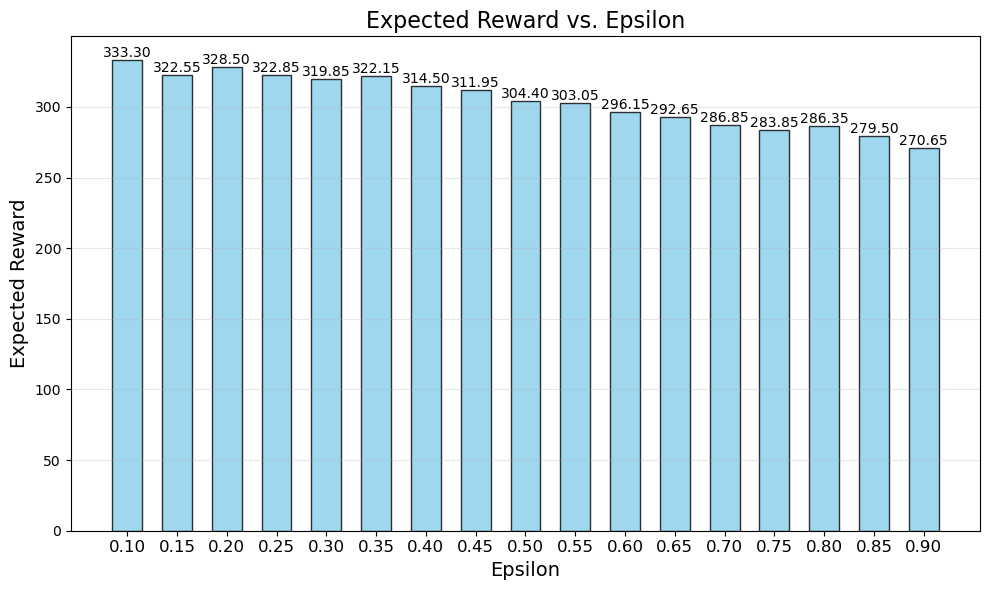

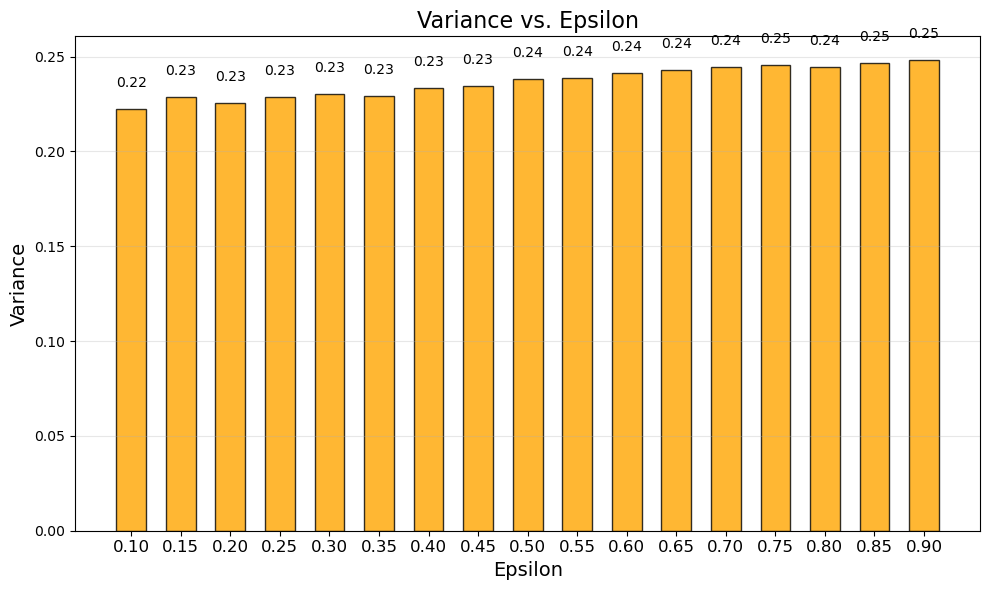

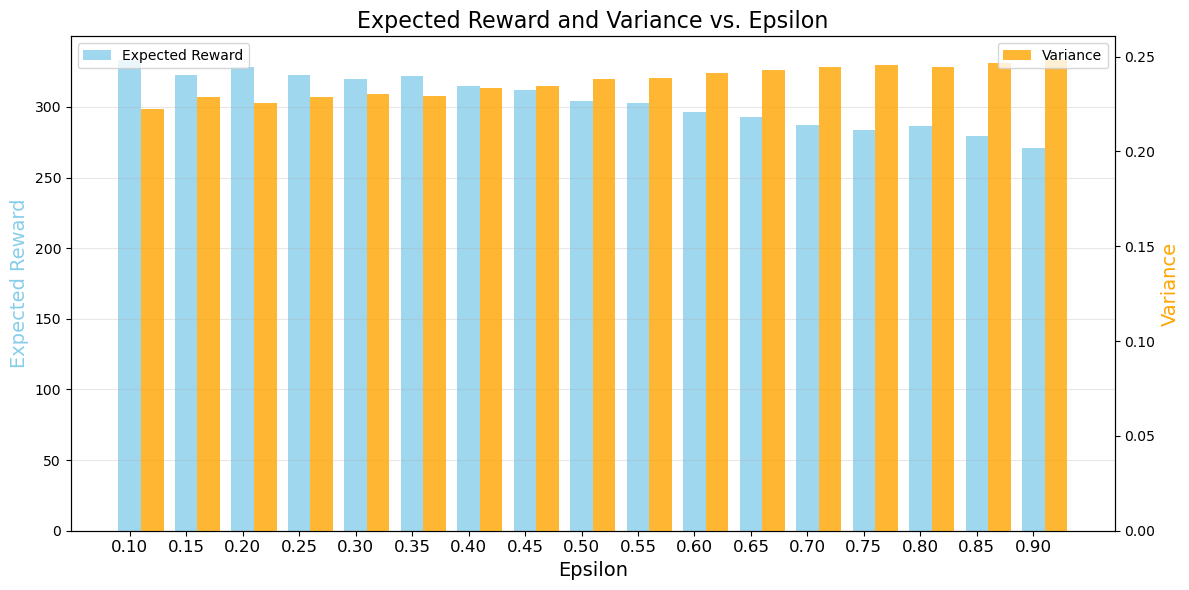

In [68]:
import numpy as np
import matplotlib.pyplot as plt

N = 500  # 每个实验的步数
num_trials = 20 # 实验次数
epsilons = np.arange(0.1, 0.95, 0.05)  # epsilon 的值从0.1到0.9，每隔0.05
results_rewards = {
    'epsilon_greedy': [],
}
results_variances = {
    'epsilon_greedy': [],
}
epsilon_rewards = {epsilon: [] for epsilon in epsilons}  # 用于记录每个epsilon下的奖励数据

# 进行实验
for epsilon in epsilons:
    cumulative_rewards = 0
    rewards = []  # 用来存储每个epsilon下的所有奖励数据

    for _ in range(num_trials):
        bandit = EpsilonGreedy(epsilon=epsilon)
        for t in range(N):
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            cumulative_rewards += reward
            rewards.append(reward)  # 存储每次的奖励

    # 计算平均奖励和方差
    avg_reward = cumulative_rewards / num_trials
    variance = np.var(rewards)

    results_rewards['epsilon_greedy'].append(avg_reward)
    results_variances['epsilon_greedy'].append(variance)
    epsilon_rewards[epsilon] = rewards  # 存储此epsilon下的奖励数据

# 生成只有期望奖励的图像
def plot_expectation(means, param_values, param_name):
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(param_values))
    plt.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        plt.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=10)
    plt.xticks(bar_positions, [f"{val:.2f}" for val in param_values], fontsize=12)
    plt.xlabel(f"{param_name.capitalize()}", fontsize=14)
    plt.ylabel("Expected Reward", fontsize=14)
    plt.title(f"Expected Reward vs. {param_name.capitalize()}", fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 生成只有方差的图像
def plot_variance(variances, param_values, param_name):
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(param_values))
    plt.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, variance in enumerate(variances):
        plt.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=10)
    plt.xticks(bar_positions, [f"{val:.2f}" for val in param_values], fontsize=12)
    plt.xlabel(f"{param_name.capitalize()}", fontsize=14)
    plt.ylabel("Variance", fontsize=14)
    plt.title(f"Variance vs. {param_name.capitalize()}", fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 生成期望奖励与方差合成图像，去掉数值标注
def plot_combined(means, variances, param_values, param_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    bar_positions = np.arange(len(param_values))  # 柱子的位置
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax1.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels([f"{epsilon:.2f}" for epsilon in param_values], fontsize=12)
    ax1.set_xlabel(f"{param_name.capitalize()}", fontsize=14)
    ax1.set_ylabel("Expected Reward", fontsize=14, color='skyblue')
    ax1.set_title("Expected Reward and Variance vs. Epsilon", fontsize=16)
    ax1.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax1.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=14, color='orange')

    # 显示图例
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # 显示图像
    plt.show()

# 绘制期望奖励图（显示每个柱状图的值）
plot_expectation(results_rewards['epsilon_greedy'], epsilons, "epsilon")

# 绘制方差图（显示每个柱状图的值）
plot_variance(results_variances['epsilon_greedy'], epsilons, "epsilon")

# 绘制期望奖励与方差合成图（去掉数值标注）
plot_combined(results_rewards['epsilon_greedy'], results_variances['epsilon_greedy'], epsilons, "epsilon")


##### 1.1(2) set epsilon as a function of t 

In order to make our strategy more in line with the reality, we decided to set epsilon's function of t. Our initial idea was to set epsilon to decrease as t increased. The purpose of this is that as the experiment continues, in order to maximize the benefit, we always choose the arm with the highest probability to pull, which is intuitively in line with our cognition. In addition, we should also consider extreme cases where we need to explore for a long time to ensure that the maximum value is selected, which is counter-intuitive, but we will also do such tests.

note: we must keep $\epsilon$ between 0 and 1


(1) linear:  $\epsilon(t)$ =  0.9 - $0.00016*t$ (in this case,we can keep $\epsilon$ between 0.1 and 0.9)


(2) exponential:  $\epsilon(t)$ = $0.8*e^{-0.00t} + 0.1$ 

(3) inverse： $\epsilon(t)$ = 0.9*$\frac{1}{t}$ (when t = 0, we let $\epsilon$ = 0.9)

(4) 

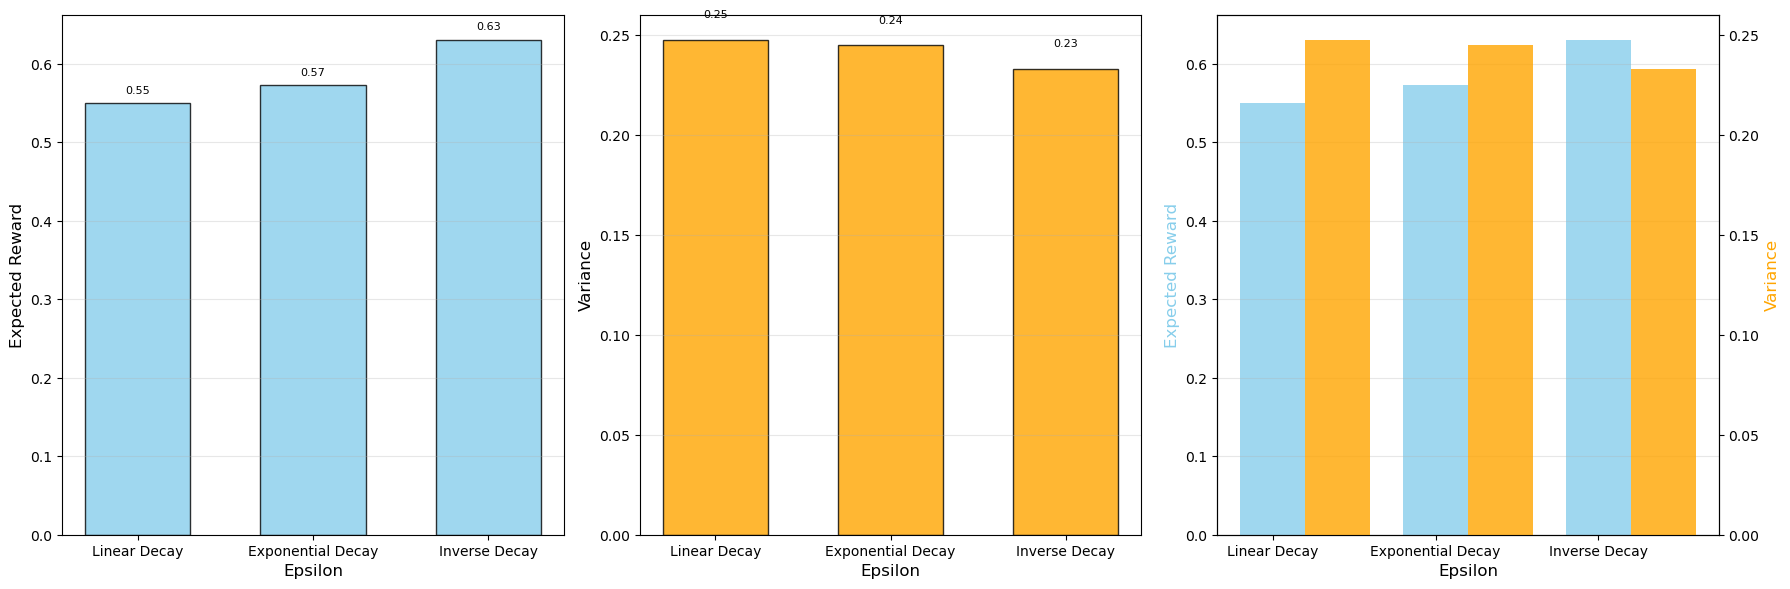

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 epsilon 函数
def epsilon_linear(t):
    return max(0.1, 0.9 - 0.00016 * t)  # 确保 epsilon 不低于 0.1

def epsilon_exponential(t):
    return 0.8 * np.exp(-t / 1000) + 0.1  # t 除以 1000 缩放，确保衰减更平缓

def epsilon_inverse(t):
    return 0.9 / max(1, t)  # 避免 t 为 0 的情况

# 定义实验参数
N = 500  # 每个实验的步数
num_trials = 20  # 实验次数
epsilon_functions = {
    "Linear Decay": epsilon_linear,
    "Exponential Decay": epsilon_exponential,
    "Inverse Decay": epsilon_inverse,
}

results_rewards = []
results_variances = []

# 假设您已经定义好了 EpsilonGreedy 类
# 直接引用已有的 EpsilonGreedy 类
# 以下是实验部分
for name, epsilon_func in epsilon_functions.items():
    cumulative_rewards = 0
    all_rewards = []  # 用于记录每个实验的所有奖励数据

    for _ in range(num_trials):
        bandit = EpsilonGreedy(epsilon=epsilon_func(0))  # 初始化时设置为 0，可以在每次选择臂时动态更新
        for t in range(N):
            epsilon_t = epsilon_func(t)  # 每次尝试时计算新的 epsilon
            bandit.modify_parameter(epsilon_t)  # 更新 epsilon
            arm = bandit.select_arm()
            reward = bandit.pull(arm)
            bandit.update(arm, reward)
            all_rewards.append(reward)

    # 计算期望和方差
    avg_reward = np.mean(all_rewards)
    variance = np.var(all_rewards)
    results_rewards.append(avg_reward)
    results_variances.append(variance)

# 生成期望奖励的图像
def plot_expectation(ax, means, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, means, width=0.6, color='skyblue', edgecolor='black', alpha=0.8)
    # 显示每个柱子对应的值
    for i, mean in enumerate(means):
        ax.text(bar_positions[i], mean + 0.01, f"{mean:.2f}", ha='center', va='bottom', fontsize=8)
    ax.set_xticks(bar_positions)

    ax.set_xticklabels(param_values, fontsize=10)
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成方差的图像
def plot_variance(ax, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    ax.bar(bar_positions, variances, width=0.6, color='orange', edgecolor='black', alpha=0.8)
    for i, variance in enumerate(variances):
        ax.text(bar_positions[i], variance + 0.01, f"{variance:.2f}", ha='center', va='bottom', fontsize=8)
    ax.set_xticks(bar_positions)

    ax.set_xticklabels(param_values, fontsize=10)
    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Variance", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

# 生成期望奖励与方差合成图像
def plot_combined(ax, means, variances, param_values, param_name):
    bar_positions = np.arange(len(param_values))
    bar_width = 0.4  # 每个柱子的宽度

    # 绘制期望奖励的柱状图
    ax.bar(bar_positions, means, bar_width, alpha=0.8, color='skyblue', label="Expected Reward")

    # 设置 x 轴为 epsilon 的值
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(param_values, fontsize=10)

    ax.set_xlabel(f"{param_name.capitalize()}", fontsize=12)
    ax.set_ylabel("Expected Reward", fontsize=12, color='skyblue')
    ax.grid(axis='y', alpha=0.3)

    # 创建第二个y轴用于方差
    ax2 = ax.twinx()
    # 绘制方差的柱状图，且设置方差的柱状图在期望的右边
    ax2.bar(bar_positions + bar_width, variances, bar_width, alpha=0.8, color='orange', label="Variance")

    # 设置右侧y轴（方差的y轴）标签，并保留对应的刻度
    ax2.set_ylabel("Variance", fontsize=12, color='orange')

# 创建一个包含 3 行 3 列的图像布局
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 绘制每个算法的期望奖励、方差和期望+方差的合成图像
plot_expectation(axs[0], results_rewards, list(epsilon_functions.keys()), "epsilon")
plot_variance(axs[1], results_variances, list(epsilon_functions.keys()), "epsilon")
plot_combined(axs[2], results_rewards, results_variances, list(epsilon_functions.keys()), "epsilon")

plt.tight_layout()
plt.show()


#### 1.2 Further exploration of UCB Algorithm

In [ ]:
cumulative_rewards = 0
cumulative_regrets = 0

for _ in range(num_trials):
    bandit = EpsilonGreedy(epsilon=1)
        
    trial_rewards = []
    for t in range(N):
        bandit.modify_parameter(epsilon= 0.98**t)
        arm = bandit.select_arm()
        reward = bandit.pull(arm)
        bandit.update(arm, reward)
        cumulative_rewards += reward
        regret = max(bandit.theta) - bandit.theta[arm]
        cumulative_regrets += regret
results_rewards['epsilon_greedy'].append(cumulative_rewards / num_trials)
results_regrets['epsilon_greedy'].append(cumulative_regrets / num_trials)

print("epsilon = 0.98^t   reward: ", results_rewards['epsilon_greedy'][3], " regret: ", results_regrets['epsilon_greedy'][3])


epsilon = 0.98^t   reward:  326.54  regret:  23.74999999999938
